In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline 

In [57]:
csvpath = 'data/cohen/metadata.csv'

rsna_csv = "data/rsna/stage_2_train_labels.csv"

In [58]:
cohen = pd.read_csv(csvpath)
rsna = pd.read_csv(rsna_csv)

In [60]:
cohen.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'needed_supplemental_O2', 'extubated',
       'temperature', 'pO2_saturation', 'leukocyte_count', 'neutrophil_count',
       'lymphocyte_count', 'view', 'modality', 'date', 'location', 'folder',
       'filename', 'doi', 'url', 'license', 'clinical_notes', 'other_notes',
       'Unnamed: 27'],
      dtype='object')

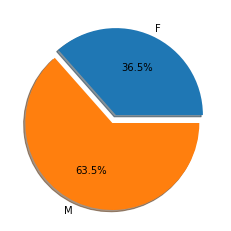

In [55]:
res = cohen.pivot_table(index=['sex'], aggfunc=['size'])

plot_pie = plt.pie(res['size'], labels=res.index, shadow=True, explode=[0,0.1], autopct='%1.1f%%')
plt.show(plot_pie)